In [1]:
import pint
import numpy as np

ureg = pint.get_application_registry()
Q_ = ureg.Quantity

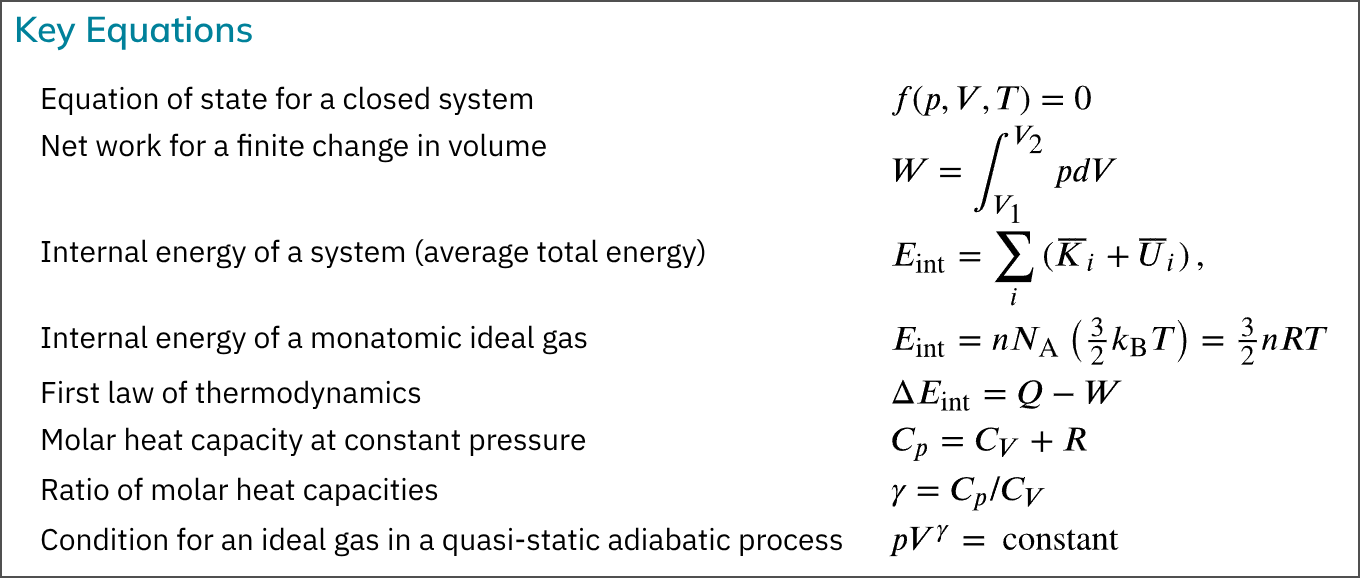

# Problem 28
As shown below, calculate the work done by the
gas in the quasi-static processes represented by
the paths (a) AB; (b) ADB; (c) ACB; and (d) ADCB.

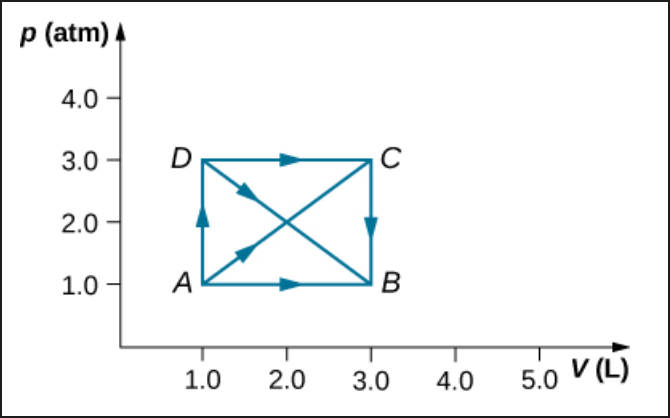

we use the formula:
$$
W = \int_{V_1}^{V_2} p dV
$$

In [2]:
A = (Q_(1.0, 'L'), Q_(1.0, 'atm'))
B = (Q_(3.0, 'L'), Q_(1.0, 'atm'))
C = (Q_(3.0, 'L'), Q_(3.0, 'atm'))
D = (Q_(1.0, 'L'), Q_(3.0, 'atm'))

# a) From A to B
volumes_list = [A[0], B[0]]
pressures_list = [A[1], B[1]]

volumes_magnitude = [v.magnitude for v in volumes_list]
pressures_magnitude = [p.magnitude for p in pressures_list]

volume_unit = volumes_list[0].units
pressure_unit = pressures_list[0].units

work_a_b = np.trapezoid(y=pressures_magnitude, x=volumes_magnitude) * pressure_unit * volume_unit
print(f"Work from A to B: {work_a_b.to('J')}")

# b) From A to D to B
volumes_list = [A[0], D[0], B[0]]
pressures_list = [A[1], D[1], B[1]]

volumes_magnitude = [v.magnitude for v in volumes_list]
pressures_magnitude = [p.magnitude for p in pressures_list]

work_a_d_b = np.trapezoid(y=pressures_magnitude, x=volumes_magnitude) * pressure_unit * volume_unit
print(f"Work from A to D to B: {work_a_d_b.to('J')}")

# c) From A to C to B
volumes_list = [A[0], C[0], B[0]]
pressures_list = [A[1], C[1], B[1]]

volumes_magnitude = [v.magnitude for v in volumes_list]
pressures_magnitude = [p.magnitude for p in pressures_list]

work_a_c_b = np.trapezoid(y=pressures_magnitude, x=volumes_magnitude) * pressure_unit * volume_unit
print(f"Work from A to C to B: {work_a_c_b.to('J')}")

# d) From A to D to C to B
volumes_list = [A[0], D[0], C[0], B[0]]
pressures_list = [A[1], D[1], C[1], B[1]]

volumes_magnitude = [v.magnitude for v in volumes_list]
pressures_magnitude = [p.magnitude for p in pressures_list]

work_a_d_c_b = np.trapezoid(y=pressures_magnitude, x=volumes_magnitude) * pressure_unit * volume_unit
print(f"Work from A to D to C to B: {work_a_d_c_b.to('J')}")

Work from A to B: 202.65000000000003 joule
Work from A to D to B: 405.30000000000007 joule
Work from A to C to B: 405.30000000000007 joule
Work from A to D to C to B: 607.95 joule


# Problem 42
During the isobaric expansion from A to B
represented below, 3,100 J of heat are added to
the gas. What is the change in its internal
energy?

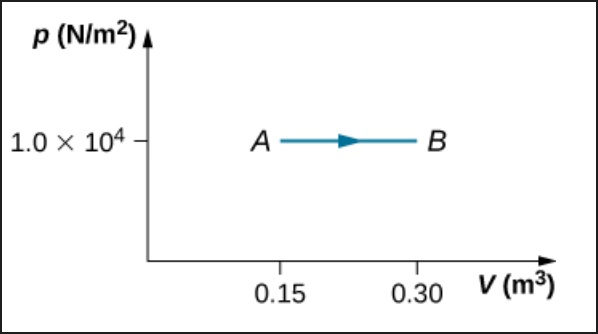

we use the formulas:
$$
W = \int_{V_1}^{V_2} p dV
$$
and
$$
\Delta E_{int} = Q - W
$$

In [3]:
heat = Q_(3100, 'J')
A = (Q_(1e4, 'N/m^2'), Q_(0.15, 'm^3'))
B = (Q_(1e4, 'N/m^2'), Q_(0.3, 'm^3'))

# We go from A to B
volumes_list = [A[1], B[1]]
pressures_list = [A[0], B[0]]

volumes_magnitude = [v.magnitude for v in volumes_list]
pressures_magnitude = [p.magnitude for p in pressures_list]

volume_unit = volumes_list[0].units
pressure_unit = pressures_list[0].units

work_a_b = np.trapezoid(y=pressures_magnitude, x=volumes_magnitude) * pressure_unit * volume_unit
print(f"Work from A to B: {work_a_b.to('J')}")

# We can now calculate the change in internal energy
change_in_internal_energy =  heat - work_a_b
print(f"Change in internal energy: {change_in_internal_energy.to('J')}")

Work from A to B: 1500.0 joule
Change in internal energy: 1600.0 joule


# Problem 45
When a gas expands along
AB (see below), it
does 20 J of work and absorbs 30 J of heat.
When the gas expands along
AC, it does 40 J of
work and absorbs 70 J of heat. 

(a) How much
heat does the gas exchange along
BC? 

(b) When
the gas makes the transition from
C to
A along
CDA, 60 J of work are done on it from
C to
D.
How much heat does it exchange along
CDA?

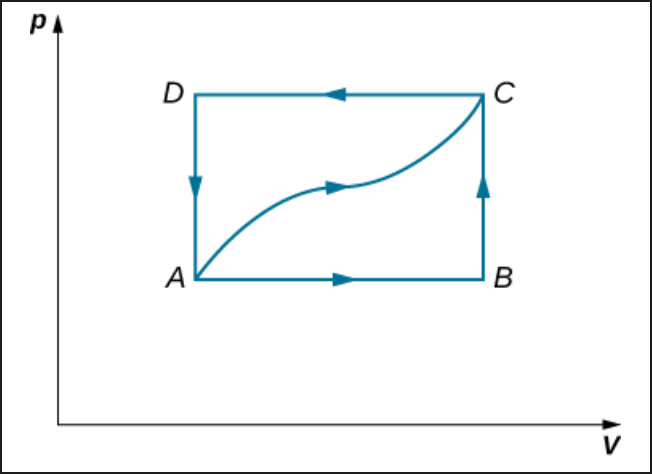

we use the formula:
$$
\Delta E_{int} = Q - W
$$

In [4]:
AB_work = Q_(20, 'J')
AB_heat_absorbed = Q_(30, 'J')

AC_work = Q_(40, 'J')
AC_heat_absorbed = Q_(70, 'J')

# a)
BC_work = AC_work - AB_work
BC_heat_absorbed = AC_heat_absorbed - AB_heat_absorbed
print(f"Work from B to C: {BC_work.to('J')}")

# b) 
CD_work = Q_(60, 'J')
# We move in the opposite direction so we change the sign
CD_work = - CD_work

# We calculate the change in internal energy from A to C
Delta_E_AC = AC_heat_absorbed - AC_work

# We now now that if we go the other way then
Delta_E_CA = - Delta_E_AC

# As we see that we go straight down from D to A we can say that
DA_work = Q_(0, 'J')
CDA_work = CD_work + DA_work
CDA_heat_absorbed = Delta_E_CA + CDA_work
print(f"Heat exchanged from C to D to A: {np.abs(CDA_heat_absorbed.to('J'))}") 

Work from B to C: 20 joule
Heat exchanged from C to D to A: 90 joule


# Problem 57
An ideal gas expands isothermally along AB and
does 700 J of work (see below). 

(a) How much
heat does the gas exchange along AB? 

(b) The
gas then expands adiabatically along BC and
does 400 J of work. When the gas returns to A
along CA, it exhausts 100 J of heat to its
surroundings. How much work is done on the
gas along this path?

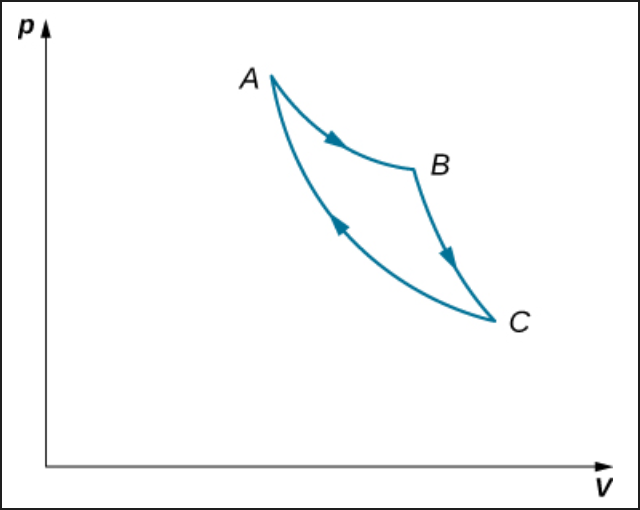

In [5]:
W_AB = Q_(700, 'J')

# a)
# We know that the gas expands isothermal from A to B, so Delta T = 0 and thus Delta E_int = 0
# If we look at the formula
# Delta E_int = Q - W
# Then we can see that Q = W
Q_AB = W_AB
print(f"Heat absorbed from A to B: {Q_AB.to('J')}")

# b) 
# We know that the gas expands adiabatically along B to C, so Q = 0
W_BC = Q_(400, 'J')
Q_BC = Q_(0, 'J')

Q_CA = Q_(-100, 'J')

# For a complete cycle, the net heat equals the net work.
# Q_net = W_net
# Q_AB + Q_BC + Q_CA = W_AB + W_BC + W_CA
W_CA = (Q_AB + Q_BC + Q_CA) - (W_AB + W_BC)
W_CA = - W_CA
print(f"Total work done in the cycle: {W_CA.to('J')}")

Heat absorbed from A to B: 700 joule
Total work done in the cycle: 500 joule


# Problem 65
When 400 J of heat are slowly added to 10 mol
of an ideal monatomic gas, its temperature rises
by 10 $\degree C$. What is the work done on the gas?

We have the formula:
$$
W = Q - \Delta E_{int}
$$
and 
$$
\Delta E_{int} = \frac{3}{2}nRT
$$

In [6]:
heat_added = Q_(400, 'J')
mol = Q_(10, 'mole')
T_increase = Q_(10, 'delta_degC')
R = Q_(8.314, 'J/(mole*K)')

Delta_E = (3/2) * mol * R * T_increase
work = heat_added - Delta_E
print(f"Work done by the gas: {work.to('J')}")

Work done by the gas: -847.1000000000001 joule


The temperature is unnecessary data for the solution

# Problem 69
Pressure and volume measurements of a dilute gas
undergoing a quasi-static adiabatic expansion are
shown below. Plot ln p vs. V and determine $\gamma$ for this
gas from your graph.

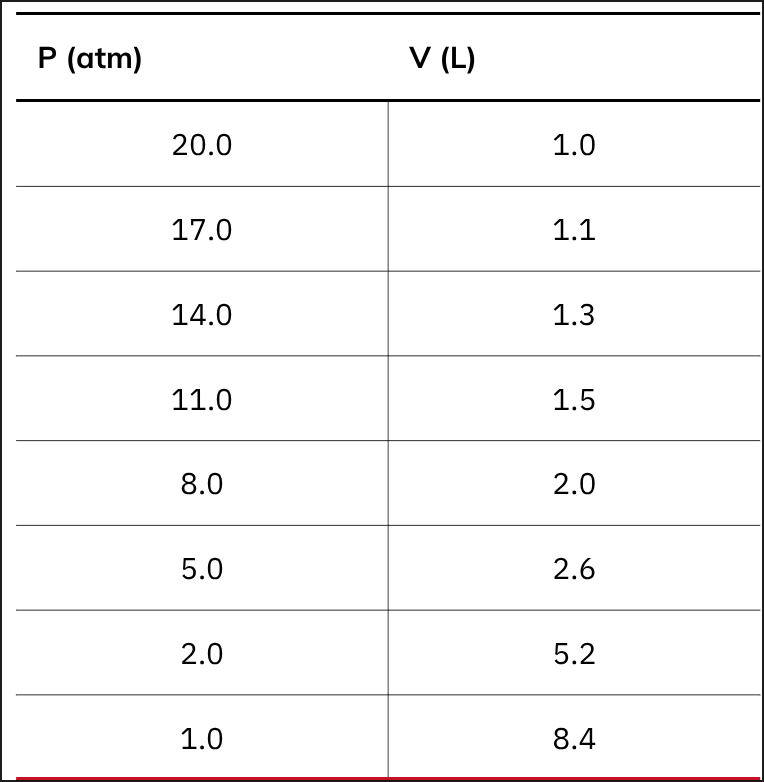

In [7]:
from matplotlib import pyplot as plt
pressure = [1.0, 2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0]
volume = [8.4, 5.2, 2.6, 2.0, 1.5, 1.3, 1.1, 1.0]

we use the formula:
$$
ln(p) + \gamma ln(V) = constant
$$
so we get
$$
ln(p) = -\gamma ln(V) + constant
$$

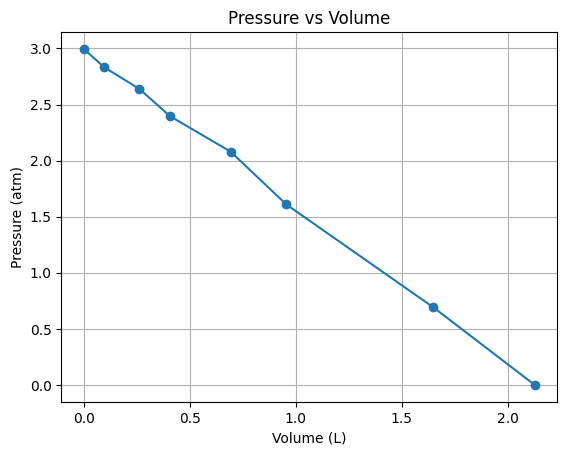

Calculated slope: 1.4011960398204093


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

log_v = np.log(np.array(volume))
log_p = np.log(np.array(pressure))
model.fit(log_v.reshape(-1, 1), log_p)

plt.plot(log_v, log_p, marker='o')
plt.title("Pressure vs Volume")
plt.xlabel("Volume (L)")
plt.ylabel("Pressure (atm)")
plt.grid(True)
plt.show()

# The calculated slope is stored in model.coef_
slope = -model.coef_[0]

print(f"Calculated slope: {slope}")



# Problem 77
On an adiabatic process of an ideal gas pressure,
volume and temperature change such that $pV^\gamma$
is constant with $\gamma = 5/3$ for monatomic gas such
as helium and $\gamma = 7/5$ for diatomic gas such as
hydrogen at room temperature. Use numerical
values to plot two isotherms of 1 mol of helium
gas using ideal gas law and two adiabatic
processes mediating between them. Use
$T_1 = 500K$, $V_1 = 1L$, and $T_2 = 300K$
for your plot.

In [27]:
# Constants for Helium (monatomic gas)
gamma = 5 / 3
n = Q_(1, 'mole')
R = Q_(8.314, 'J/(mole*K)')

# State 1 (on the first isotherm)
T1 = Q_(500, 'K')
V1 = Q_(1, 'L')
P1 = (n * R * T1) / V1

# State 2 temperature
T2 = Q_(300, 'K')

# Create a volume range as a pint Quantity object
V_range = np.linspace(0.5, 10, 200) * ureg.L

# Isotherms
# Calculate pressure over the entire volume range
P_iso1 = (n * R * T1) / V_range
P_iso2 = (n * R * T2) / V_range

# Adiabat
# Calculate the adiabatic constant `k` with its units
k1 = P1 * V1**gamma
# Calculate the adiabatic pressure curve over the entire volume range
P_adia1 = k1 / V_range**gamma

# Find the intersection point on the second isotherm
# For an adiabat, T*V^(gamma-1) is constant.
V2 = V1 * (T1 / T2)**(1 / (gamma - 1))
P2 = (n * R * T2) / V2

# --- Plotting ---
plt.figure(figsize=(10, 7))
plt.style.use('seaborn-v0_8-whitegrid')

plt.plot(V_range.to('m^3').magnitude, P_iso1.to('Pa').magnitude, label=f'Isotherm at {T1:~P}', color='blue')
plt.plot(V_range.to('m^3').magnitude, P_iso2.to('Pa').magnitude, label=f'Isotherm at {T2:~P}', color='dodgerblue', linestyle='--')
plt.plot(V_range.to('m^3').magnitude, P_adia1.to('Pa').magnitude, label='Adiabat', color='red')

plt.plot(V1.to('m^3').magnitude, P1.to('Pa').magnitude, 'ko')
plt.text(V1.to('m^3').magnitude * 1.1, P1.to('Pa').magnitude, f'(V1, T1)')
plt.plot(V2.to('m^3').magnitude, P2.to('Pa').magnitude, 'ko')
plt.text(V2.to('m^3').magnitude * 1.1, P2.to('Pa').magnitude, f'(V2, T2)')

# Formatting
plt.title('Isothermal and Adiabatic Processes for 1 Mole of Helium', fontsize=16)
plt.xlabel('Volume (m^3)', fontsize=12)
plt.ylabel('Pressure (Pa)', fontsize=12)
plt.xlim(0, 8)
plt.ylim(0, 50)
plt.legend(fontsize=11)

plt.show()

ValueError: Image size of 839x44812530 pixels is too large. It must be less than 2^23 in each direction.

<Figure size 1000x700 with 1 Axes>